In [4]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('AQI.csv')
df


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,25-11-2020 01:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,25-11-2020 02:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,25-11-2020 03:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,25-11-2020 04:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,25-11-2020 05:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,24-01-2023 04:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,24-01-2023 05:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,24-01-2023 06:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,24-01-2023 07:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [6]:
df.head()


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,25-11-2020 01:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,25-11-2020 02:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,25-11-2020 03:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,25-11-2020 04:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,25-11-2020 05:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [7]:
df.tail()


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
18771,24-01-2023 04:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,24-01-2023 05:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,24-01-2023 06:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,24-01-2023 07:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47
18775,24-01-2023 08:00,1134.87,8.61,56.89,80.11,110.63,123.76,140.26,5.51


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [9]:
df.size


168984

In [10]:
df.shape


(18776, 9)

In [11]:
col_use = ['no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'co']
df = df[col_use]


In [12]:
df.shape


(18776, 8)

In [13]:
df.isnull().sum()


no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
co       0
dtype: int64

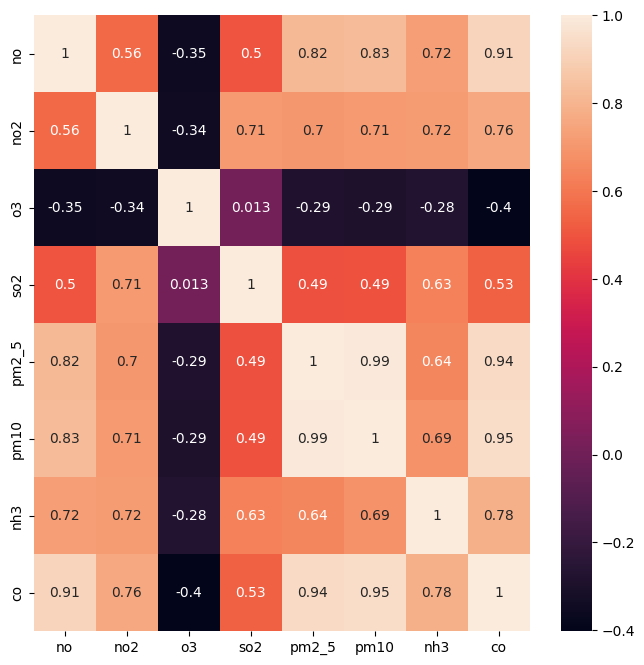

In [14]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()


<Figure size 1000x1000 with 0 Axes>

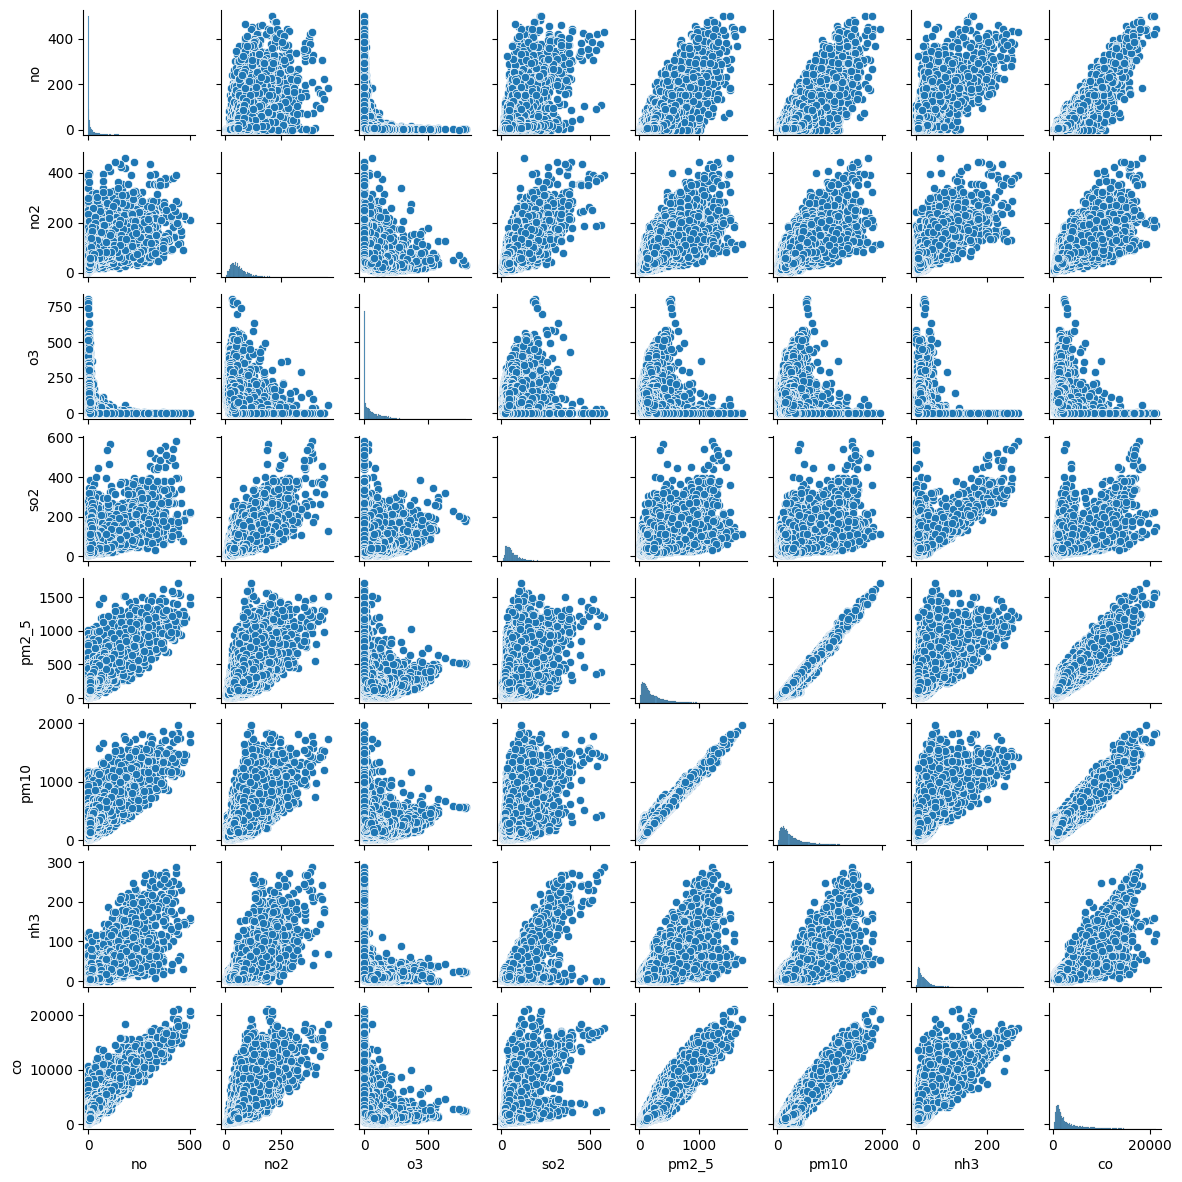

In [15]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, height=1.5)
plt.show()


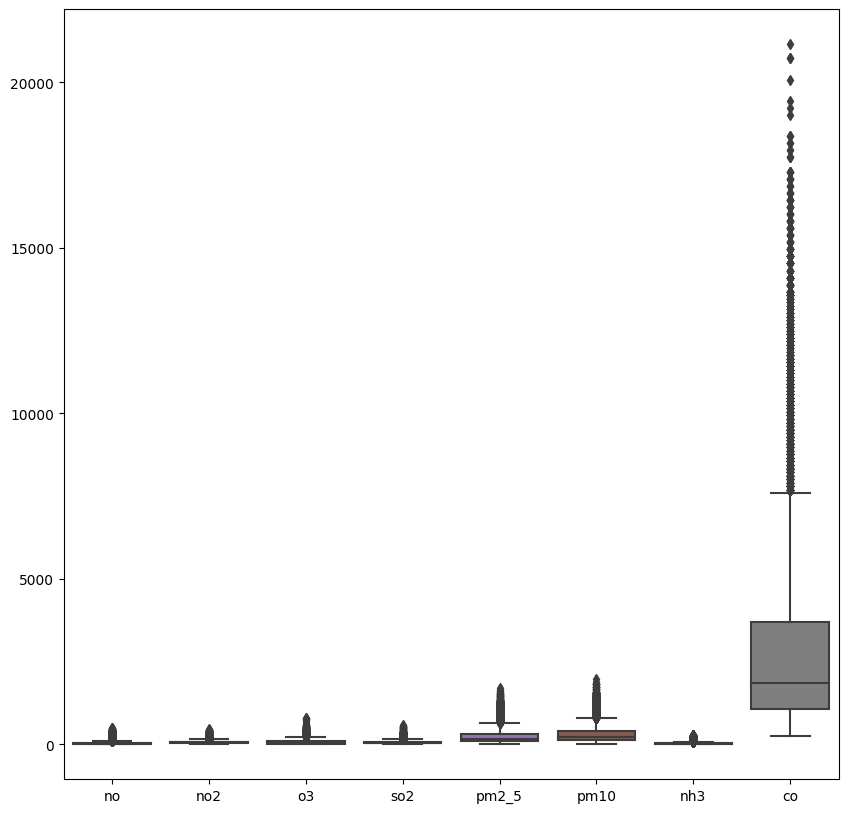

In [16]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.show()


In [17]:
for cols in df.columns[:-1]:
    if df[cols].dtype == object:
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3 - Q1

        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        df.loc[(df[cols] > high)] = df[cols].median()


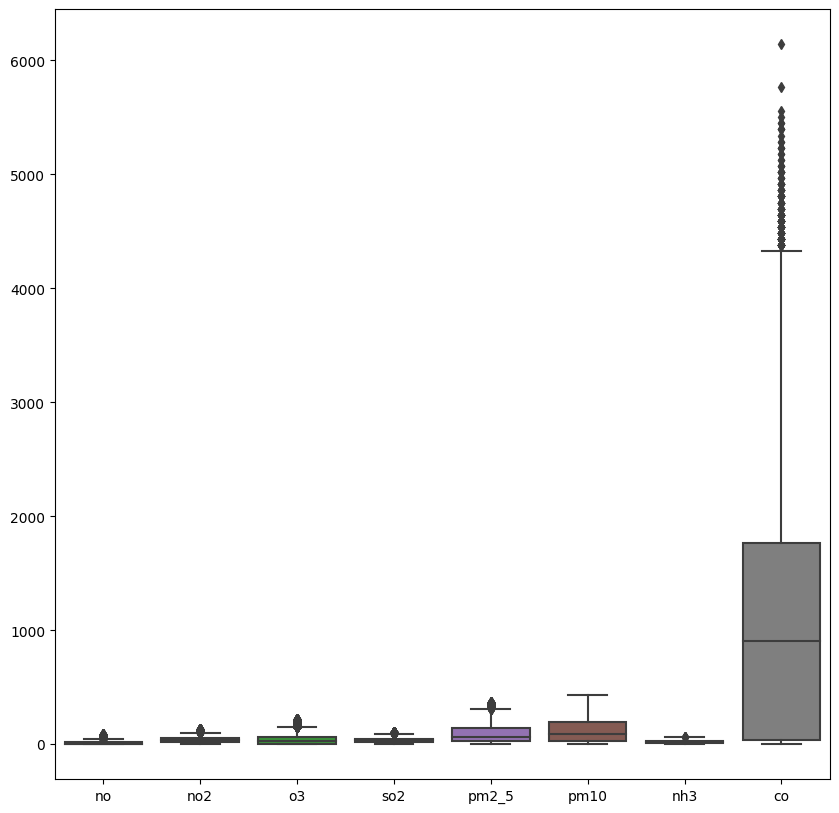

In [18]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.show()


In [19]:
X = df['pm10'].values.reshape(-1, 1)
Y = df['co'].values


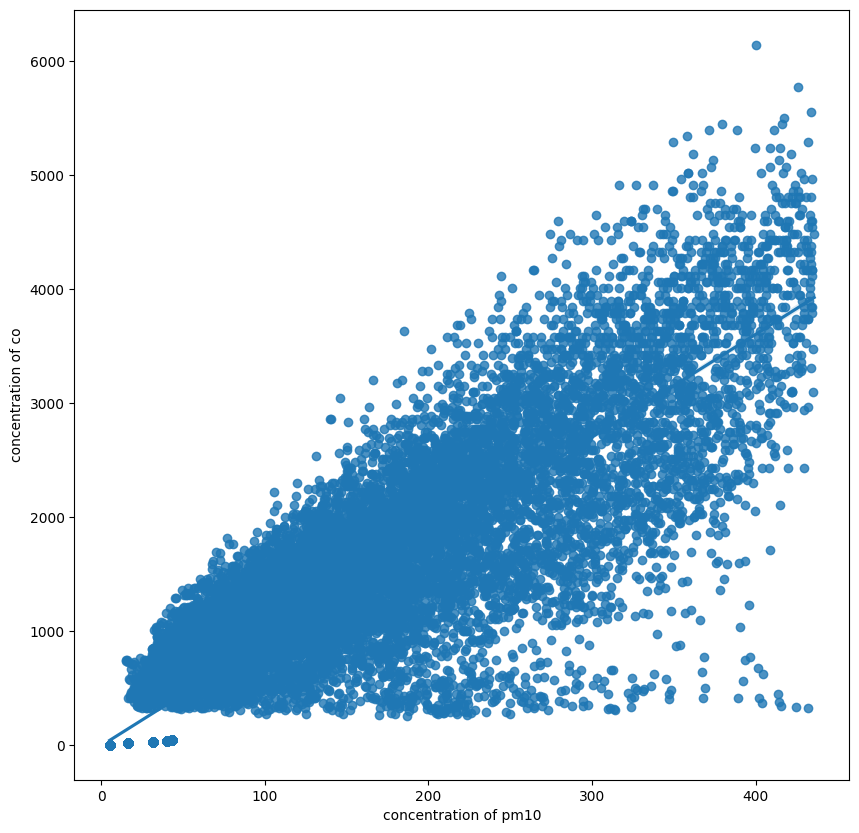

In [20]:
plt.figure(figsize = (10, 10));
sns.regplot(data = df, x = X, y = Y);
plt.xlabel('concentration of pm10')
plt.ylabel("concentration of co")
plt.show();

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled, Y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
print("training score is", model.score(X_train, y_train))


training score is 0.7967184939351699


In [25]:
print("testing score is", model.score(X_test, y_test))


testing score is 0.7956719159553969


In [26]:
y_Pred = model.predict(X_test)


In [27]:
print("mean squared error is ", r2_score(y_Pred, y_test))


mean squared error is  0.7410127943196783


In [28]:
print("r2 score is ", r2_score(y_Pred, y_test))


r2 score is  0.7410127943196783


In [29]:
X = df.drop('co', axis=1)
X.shape


(18776, 7)

In [30]:
Y = df['co']


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled, Y, test_size=0.2, random_state=42)


In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:
print("training score is", model.score(X_train, y_train))


training score is 0.8874822342048637


In [35]:
print("testing score is", model.score(X_test, y_test))


testing score is 0.8835719781942853


In [36]:
y_Pred = model.predict(X_test)


In [37]:
print("mean squared error is ", r2_score(y_Pred, y_test))


mean squared error is  0.8681046418639812


In [38]:
print("r2 score is", r2_score(y_Pred, y_test))


r2 score is 0.8681046418639812


In [39]:
y_Pred


array([ -33.96492053,  301.75311197,  -33.96492053, ..., 2281.22254099,
       1099.98010073, 1265.30760173])